# A/B Testing

# Section


*   [Introduction](https://colab.research.google.com/drive/1TWZNhKxKhjQjjwC7l_cvIb7lItCXfZjT#scrollTo=85FGB48D_FOh&line=2&uniqifier=1)
*  [ Data Cleaning & Preparation](https://colab.research.google.com/drive/1TWZNhKxKhjQjjwC7l_cvIb7lItCXfZjT#scrollTo=A5wdgiSKIcqb)

*   [Explatory Data Analysis](https://colab.research.google.com/drive/1TWZNhKxKhjQjjwC7l_cvIb7lItCXfZjT#scrollTo=uaU4jTHB32HC&line=1&uniqifier=1)
*   [Hypotesis Testing](https://colab.research.google.com/drive/1TWZNhKxKhjQjjwC7l_cvIb7lItCXfZjT#scrollTo=ch9U2Tdn9_Mm&line=1&uniqifier=1)









# Introduction

Background : An e-commerce wants to improve their landing page. Companies want to understand whether they should implement new pages or maintain old pages.

Goal :Helps companies to make decisions whether to implement new pages or keep old pages

# Data Cleaning & Preparattion

In [1]:
#import the data
from google.colab import files
uploaded = files.upload()

Saving ab_data.csv to ab_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'/content/ab_data.csv',sep=',')
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [4]:
df.shape

(294478, 5)

In [5]:
df.info

<bound method DataFrame.info of         user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
...         ...                         ...        ...          ...        ...
294473   751197  2017-01-03 22:28:38.630509    control     old_page          0
294474   945152  2017-01-12 00:51:57.078372    control     old_page          0
294475   734608  2017-01-22 11:45:03.439544    control     old_page          0
294476   697314  2017-01-15 01:20:28.957438    control     old_page          0
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page          0

[294478 rows x 5 co

In [6]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [7]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [8]:
df.drop_duplicates(subset='user_id')

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [9]:
df_treatment=df[df.group=='treatment']
df_control=df[df.group=='control']

In [10]:
df_treatment.landing_page.unique()

array(['new_page', 'old_page'], dtype=object)

In [11]:
df_control.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [12]:
df_treatment[df_treatment.landing_page=='old_page']

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [13]:
df_control[df_control.landing_page=='new_page']

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [14]:
df.loc[df.landing_page=='new_page','group']='treatment'
df.loc[df.landing_page=='old_page','group']='control'

In [15]:
df_treatment=df[df.group=='treatment']
df_control=df[df.group=='control']

In [16]:
df_treatment.landing_page.unique()

array(['new_page'], dtype=object)

In [17]:
df_control.landing_page.unique()

array(['old_page'], dtype=object)

In [18]:
df_treatment.shape

(147239, 5)

In [19]:
df_control.shape

(147239, 5)

# Exploratory Data Analysis (EDA)

In [20]:
control_sum=df_control.converted.sum()
treatment_sum=df_treatment.converted.sum()

control_count=df_control.converted.count()
treatment_count=df_treatment.converted.count()

In [21]:
print(control_sum,treatment_sum,control_count,treatment_count)

17739 17498 147239 147239


In [22]:
converted_control=control_sum/control_count
converted_treatment=treatment_sum/treatment_count

In [23]:
print(converted_control,converted_treatment)

0.12047759085568362 0.11884079625642663


In [24]:
x=['treatment','control']
value=[converted_treatment,converted_control]

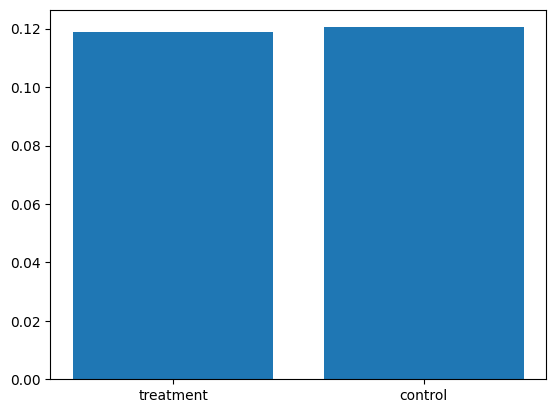

In [25]:
plt.bar(x,value)
plt.show()

# Hypotesis Test

z-test will be used to prove the hypothesis

H0 : Old page can provide a higher or equal to conv rate new pages

H1 : New pages can provide a higher conv rate than old pages

In [26]:
import statsmodels.stats.proportion as sp

In [27]:
succes=np.array([treatment_sum,control_sum])
obs=np.array([treatment_count,control_count])

In [28]:
stats,pvalue=sp.proportions_ztest(succes,obs)

In [29]:
pvalue

0.17120750909314209

In [30]:
a=0.05
conv=1-a
conv

0.95

In [31]:
if pvalue<a:
  print('accept H1')
else:
  print('reject H1')

reject H1


In [32]:
stats

-1.3683341399998907

**Result** : New landing page doesn't give better conversion rate than the old one.

# Recommendation
The company can keep using the old landing page, because the hypothesis testing result show that new landing page doesn't give better conversion rate than the old one